In [1]:
import geopandas as gpd
import pandas as pd

### Na pasta que enviei, existem alguns arquivos:
- Base de faces de logradouros (seções de via divididas por quarteirão);
- Base do Cadastro Nacional de Endereços para Fins Estatísticos (CNEFE);
- Base de Setores censitários do IBGE;
- Dados estatísticos do IBGE agregados por setor censitário.

Esses arquivos provavelmente não serão todos utilizados pelos dois, mas existe bastante interseção então estou mandando exemplos de todos. Vou compartilhar o conjunto completo de dados na pasta do drive, mas são muitos arquivos, cuidado para não encher a memória do PC.

Mas antes de começar, vamos aprender algumas funcionalidades do Python para explorar arquivos no computador. Vamos acabar utilizando muito isso porque nossos arquivos têm fontes diferentes em muitos casos. O módulo principal para se lidar com arquivos do Sistema Operacional é o `os`, mas eu costumo utilizar o `glob` com mais frequência. Vou mostrar como mexer com os dois.

In [2]:
import os
from glob import glob

O os é utilizado para operações básicas de sistema operacional, como **mudar pasta de trabalho**, **deletar ou renomear arquivos**, **listar arquivos na pasta**, etc. Os comandos a seguir são alguns exemplos: 

In [3]:
#pega o caminho do diretório de trabalho atual
wdir = os.getcwd()
print("Diretório atual de trabalho: ", wdir)

#o diretório de trabalho é a pasta em que o Python está rodando
#no diretório atual existe um arquivo chamado "simple_text.txt", que podemos abrir.
file = open('simple_text.txt')
print("\nPrimeira linha do arquivo: ", file.readline())

Diretório atual de trabalho:  D:\Andre\Novo_Python\IC-Tutoriais\2

Primeira linha do arquivo:  "nothing_here"


In [4]:
#agora vamos mudar a pasta de trabalho para uma subpasta da pasta de trabalho
os.chdir('dados_temp')
#imprime o novo caminho
new_wdir = os.getcwd()
print("Diretório atual de trabalho: ", new_wdir)

Diretório atual de trabalho:  D:\Andre\Novo_Python\IC-Tutoriais\2\dados_temp


In [5]:
#nesse novo diretório `dados_temp` não existe um arquivo chamado "simple_text.txt"
#portanto esse comando nessa pasta deve falhar.
file = open('simple_text.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'simple_text.txt'

In [6]:
#ainda dá para abrir esse arquivo, mas você precisa passar o caminho completo
#Essa é a maneira preferível de se acessar arquivos, ficar mudando de pasta
#de trabalho pode enrolar as coisas.
file = open('D:\\Andre/Novo_Python\\IC-Tutoriais\\2\\simple_text.txt')
print("\nPrimeira linha do arquivo: ", file.readline())


Primeira linha do arquivo:  "nothing_here"


In [7]:
#vamos voltar ao diretório original. O código a seguir volta um diretório como o "<-" do windows
os.chdir('..')
new_wdir = os.getcwd()
print("Diretório atual de trabalho: ", new_wdir)

Diretório atual de trabalho:  D:\Andre\Novo_Python\IC-Tutoriais\2


In [8]:
#para listar os arquivos e pastas de um diretório:
os.listdir()

['.ipynb_checkpoints',
 'André.ipynb',
 'BASE DE INFORMACOES POR SETOR CENSIT╡RIO Censo 2010 - Universo.pdf',
 'cache',
 'dados_temp',
 'Full.ipynb',
 'Gerardo.ipynb',
 'simple_text.txt']

Conseguir a lista de arquivos em um determinado diretório é a tarefa que mais vamos usar, mas a biblioteca glbo é melhor que o os para essa tarefa. nela podemos especificar que palavras chave procuramos nos arquivos. Por exemplo, se quisermos todas as pastas com "Tracts" no meio do nome dentro da pasta "dados_temp":

In [9]:
glob('dados_temp\\*Tracts*')

['dados_temp\\Census_Tracts_Geographic_Data',
 'dados_temp\\Census_Tracts_Statistic_Data']

São duas pastas encontradas. Esse método é útil porque em geral os arquivos do IBGE são referênciados pelo código da cidade. Por exemplo **1200328** é o código da cidade **Jordão**, no estado do Acre e se quisermos os arquivos de logradouros dessa cidade específica, queremos os arquivos que começam com esse código na pasta **Census_Streets_Geographic_Data**

In [10]:
glob('dados_temp\\Census_Streets_Geographic_Data\\1200328*')

['dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.cpg',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.dbf',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.prj',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.shp',
 'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.shx']

Para ler no GeoPandas, em geral só precisamos do caminho do arquivo com extensão `.shp`:

In [11]:
file = glob('dados_temp\\Census_Streets_Geographic_Data\\1200328*.shp')
file[0]

'dados_temp\\Census_Streets_Geographic_Data\\1200328_faces_de_logradouros_2019.shp'

A lógica é sempre essa, no glob o `*` é caractere coringa que significa *qualquer coisa*. Ou seja, estamos buscando arquivos que começam com o código, têm alguma coisa a mais no meio (ou nada, o `*` também pode substituir o *nada*) e termina com a extensão `.shp`. Mas no caso de estarmos explorando mais de uma pasta, é preciso indicar que existem diretórios intermediários:

In [12]:
#dentro da pasta "Census_Tracts_Geographic_Data" existem duas pastas.
#Queremos qualquer arquivo com extensão ".shp" dentro de qualquer dessas pastas:
files = glob('dados_temp\\Census_Tracts_Geographic_Data\\*\\*.shp')
#deve haver um arquivo na pasta "ac_setores_censitarios" e outro na "ac_setores_censitarios"
files

['dados_temp\\Census_Tracts_Geographic_Data\\ac_setores_censitarios\\12SEE250GC_SIR.shp',
 'dados_temp\\Census_Tracts_Geographic_Data\\al_setores_censitarios\\27SEE250GC_SIR.shp']

<AxesSubplot:>

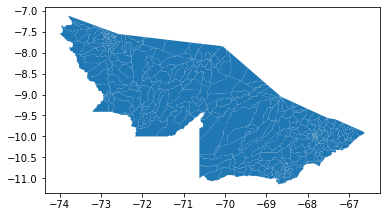

In [13]:
#podemos ler o primeiro arquivo, como fizemos no tutorial
gdf = gpd.read_file(files[0])
gdf.plot()

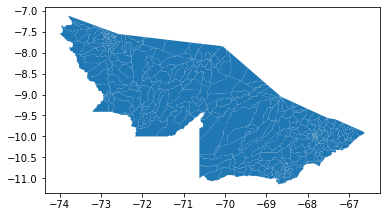

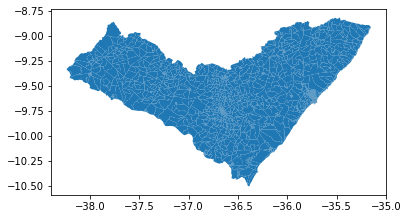

In [14]:
#ler os arquivos em um for
for file in files:
    gdf = gpd.read_file(file)
    gdf.plot()

No momento estamos utilizando arquivos da pasta onde o jupyter-notebook está, mas como os arquivos que vamos utilizar são relativamente numerosos e grandes, eu prefiro utilizar os arquivos diretamente do drive. Existem bibliotecas dedicadas a isso, mas no windows é muito mais fácil instalar o drive para desktop e utilizar os arquivos direto do disco local "G:\" que é o disco padrão da nuvem da Google (pode ter outro nome caso tenha sido alterado na instalação).

https://www.google.com/intl/pt-BR/drive/download/

No exemplo abaixo, vou utilizar os arquivos de uma pasta do meu google drive, mas vou compartilhar com vocês a parta com todos os dados que utilizarão.

*Obs: Os primeiros dois números do código de uma cidade expressam o estado ao qual a cidade pertence. 27, por exemplo, quer dizer que o estado é Alagoas. Aliás, todos os estados do nordeste começam com 2,
os do norte com 1, sudeste com 3, sul 4 e centro-oeste com 5.*

In [15]:
#todos os arquivos que se referem a Alagoas:
alagoas = "G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\27*.shp"
print("arquivos de Alagoas:")
a_files = glob(alagoas)
a_files

arquivos de Alagoas:


['G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\27SEE250GC_SIR.shp']

In [16]:
#todos os arquivos que se referem do Nordeste:
ne = "G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\2*.shp"
print("\n\narquivos do NE:")
ne_files = glob(ne)
ne_files



arquivos do NE:


['G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\22SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\23SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\27SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\29SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\24SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\21SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\25SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\26SEE250GC_SIR.shp',
 'G:\\My Drive\\Dados\\Censo 2010 BR\\setores_censitarios\\extr\\28SEE250GC_SIR.shp']

<AxesSubplot:>

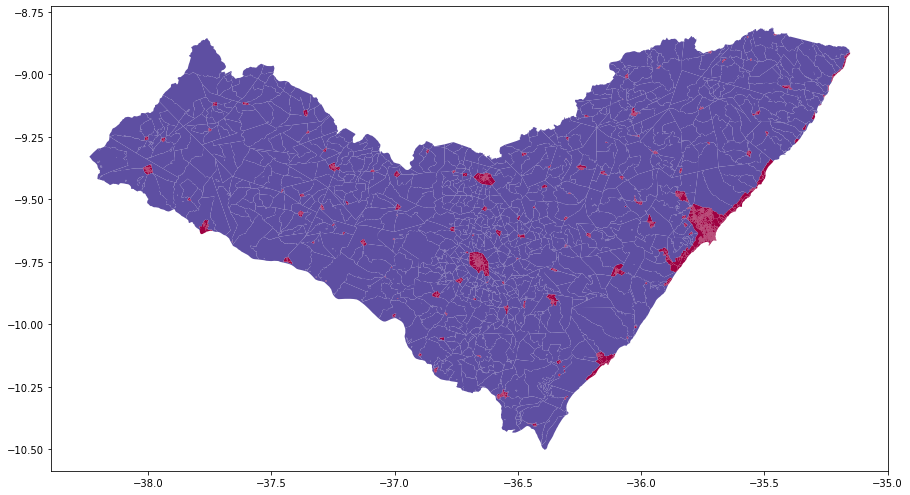

In [17]:
#e podemos carreagr pos arquivos direto do drive
gdf = gpd.read_file(a_files[0])
#plotar plotar regiões urbanas e rurais com cores diferentes:
gdf['colors'] = [1 if n else 0 for n in gdf['TIPO']=='URBANO']
gdf.plot(column='colors',cmap='Spectral_r',
         figsize=(15,10))

# Específico André 

## Lidando com dados do IBGE

O IBGE divide seu banco de dados do último censo (2010) em duas parcelas, uma contendo os arquivos geográficos e outra contendo os arquivos estatísticos. Isso acontece porque os dados estatísticos coletados pelo IBGE são muito detalhados e é complicado lidar com eles se eles estiverem em um arquivo só.

Os dados geográficos que temos estão separados por Estado, vamos carregar algum deles direto do drive:

<AxesSubplot:>

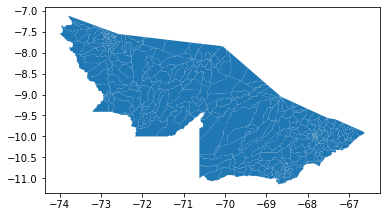

In [18]:
#alterar linha abaixo com o caminho do seus dados no disco G: 
#ou, caso tenha optado por fazer o download dos arquivos, 
#a pasta onde estão 
d_path =  ('G:\\Shared drives\\Grupo de Pesquisa ITS\\04_students\\AndreMorelli\\_Dados\\Base Para IC - Andre+Gerardo')

#os arquivos geográficos estão em 'Census_Tracts_Geographic_Data" 
#em pastas específicas por estado. Vamos pegar o Acre (cod. 12) por hora
ac_file = glob(d_path + '\\Census_Tracts_Geographic_Data\\*\\12*.shp')[0]
gdf = gpd.read_file(ac_file)
gdf.plot()

In [19]:
#vamos ver o que há no gdf
gdf.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,1,120020305000030,URBANO,None,None,12002030500,None,120020305,CRUZEIRO DO SUL,1200203,CRUZEIRO DO SUL,CRUZEIRO DO SUL,VALE DO JURUÁ,"POLYGON ((-72.69164 -7.63101, -72.69174 -7.630..."
1,2,120020305000031,URBANO,None,None,12002030500,None,120020305,CRUZEIRO DO SUL,1200203,CRUZEIRO DO SUL,CRUZEIRO DO SUL,VALE DO JURUÁ,"POLYGON ((-72.68007 -7.63158, -72.68077 -7.630..."
2,3,120020305000032,URBANO,None,None,12002030500,None,120020305,CRUZEIRO DO SUL,1200203,CRUZEIRO DO SUL,CRUZEIRO DO SUL,VALE DO JURUÁ,"POLYGON ((-72.68701 -7.62252, -72.68768 -7.621..."


Em geral, vamos trabalhar apenas na escala urbana. Note que no gdf existem vários códigos específicos:
- CD_GEOCODI: Código da zona censitária
- CD_GEOCODB: Código do bairro
- CD_GEOCODS: Código do subdistrito
- CD_GEOCODD: Código do distrito
- CD_GEOCODM: Código do município

Em teoricamente, é possível filtrar os dados de uma cidade específica pelo nome, mas existem muitas divergências na nomenclatura de cidades ("Ribeirão Preto" pode ser "Ribeirao Preto"; "Santa Barbára do Oeste" pode também ser "Santa Barbára d´Oeste"). Dessa forma, é mais seguro trabalhar com o código de município. No arquivo `municípios.csv` todas as cidades brasileiras são catalogadas com seu respectivo código (coluna IBGE7).

Vamos olhar para Rio Branco - `Cod. 1200401`

<AxesSubplot:>

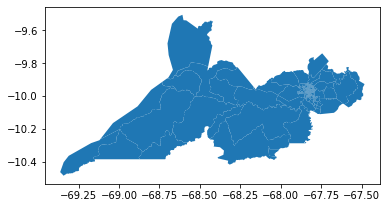

In [20]:
#criamos uma cópia do gdf para desatrelar o gdf da cidade do referente ao estado
RioBranco = gdf[gdf['CD_GEOCODM']=='1200401'].copy() 
RioBranco.plot()

Com esses dados temos apenas informação geográfica, como as bordas de cada setor censitário e a região a que ele pertence. Para dados do censo, vamos tratar dos dados estatísticos. Essa é a parcela com maior densidade de informações, o pdf que enviei junto com este notebook contém a documentação do IBGE sobre as variáveis, ele diz o que cada arquivo da pasta que vamos explorar contém. Por exemplo, na página **45** começam as informações do arquivo `Basico.csv`/`Basico.xls` e a tabela nos diz que as variáveis `V001` e `V002` se referem ao número de domicílios particulares permanentes e ao número de residentes em domicílio permanentes, respectivamente. Vamos adicionar esses dois dados em nosso gdf

In [21]:
csv_location = d_path+'\\Cesus_Tracts_Statistic_Data\\Basico.csv'
#carregar os dados. Nesse arquivo o separador é ponto e vírgula ";"
stat_data = pd.read_csv(csv_location, sep=';')
stat_data.head(3)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,120001305000001,1,Região Norte,AC,Acre,1202,Vale do Acre,12004,Rio Branco,0,...,3.39,2.60,1368.91,37074622.68,1601.80,43033612.85,758.58,13786625.70,1249.62,22114423.28
1,120001305000002,1,Região Norte,AC,Acre,1202,Vale do Acre,12004,Rio Branco,0,...,3.52,2.63,737.47,820504.57,805.80,841534.36,407.43,510601.28,716.42,676770.34
2,120001305000003,1,Região Norte,AC,Acre,1202,Vale do Acre,12004,Rio Branco,0,...,3.53,2.88,606.40,1108707.24,767.15,1279744.31,411.93,757913.63,689.39,1077559.69


In [22]:
#vamos priemiro filtrar apenas os dados que queremos
#Queremos as duas variáveis mais o código do setor para fundir os dados
stat_data = stat_data[['Cod_setor','V001','V002']]

#renomear colunas para ficar mais fácil
#o codigo do setor refere-se ao GEOCODI dos arquivos geográficos
stat_data.rename(columns={'Cod_setor':'CD_GEOCODI',
                          'V001':'Domicilios',
                          'V002':'Pessoas'},
                 inplace=True)
stat_data.head(3)

,CD_GEOCODI,Domicilios,Pessoas
0,120001305000001,282.0,957.0
1,120001305000002,342.0,1203.0
2,120001305000003,482.0,1700.0


In [23]:
# agora vamos tentar fundir os dados
RioBranco = RioBranco.merge(stat_data, on='CD_GEOCODI')
RioBranco

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [24]:
#Houve um erro porque a coluna do geodataframe está 
#definida como "object" enquanto no csv está como valor numérico
#Vamos resolver
import numpy as np
RioBranco['CD_GEOCODI'] = np.int64(RioBranco['CD_GEOCODI'])
RioBranco = RioBranco.merge(stat_data, on='CD_GEOCODI')
RioBranco.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,Domicilios,Pessoas
0,465,120040105000101,URBANO,None,None,12004010500,None,120040105,RIO BRANCO,1200401,RIO BRANCO,RIO BRANCO,VALE DO ACRE,"POLYGON ((-67.83714 -9.97870, -67.83778 -9.978...",423.0,1394.0
1,466,120040105000102,URBANO,None,None,12004010500,None,120040105,RIO BRANCO,1200401,RIO BRANCO,RIO BRANCO,VALE DO ACRE,"POLYGON ((-67.83860 -9.97856, -67.83925 -9.978...",318.0,1072.0
2,467,120040105000103,URBANO,None,None,12004010500,None,120040105,RIO BRANCO,1200401,RIO BRANCO,RIO BRANCO,VALE DO ACRE,"POLYGON ((-67.84304 -9.97022, -67.84293 -9.969...",297.0,1062.0


<AxesSubplot:>

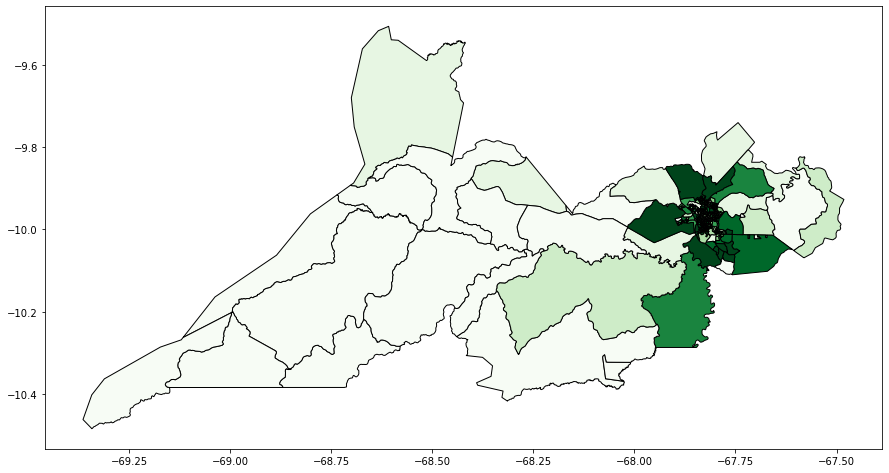

In [25]:
#Agora temos os dados de população, vamos plotar

#obs: Para a linha abaixo voc~e precisará da biblioteca "mapclassify":
#rode no prompt: pip install mapclassify

#mapa da população em cada zona
RioBranco.plot(column='Pessoas',scheme='quantiles', k=10,
               cmap='Greens',figsize=(15,10), edgecolor='k')

# Para a IC
Agora começarão as tarefas relativas ao IC. Eu não programei nenhuma função que faça as coisas que estou pedindo nessas tarefas, então se considera que seja impossível ou que existe um jeito melhor de fazer, pode seguir do seu jeito. O que importa mais são os objetivos.

# Primeira tarefa: Setores censitários a partir de código da cidade

Essa vai ser a primeira parte do nosso módulo para obter dados de empregos por zona censitária, que é o objetivo do seu trabalho. O primeiro passo lógico para atingir esse objetivo é obter as zonas censitárias com certas informações para uma determinada cidade.

Então vamos fazer algo nessa linha: uma função que recebe o código de um município e extrai as zonas censitárias referentes a esse município. Lembre-se que os arquivos geográficos estão separados por estado, então você tem que carregar eles com os dois primeiros dígitos do código e depois filtrar o banco de dados pelo código completo. Além disso, é importante referenciar o local onde as pastas `Cesus_Tracts_Statistic_Data` e `Cesus_Tracts_Geographic_Data` estão para o código funcionar em computadores diferentes.

Também é interessante que o código seja flexível. Por exemplo, se o código for `code=1200401` representado por um inteiro ou `code="1200401"` representado por uma string, o código deve retornar a mesma coisa.

In [26]:
def fetch_census_tracts(code, files_path):
    ##início do código aqui##
    
    ##fim do código aqui##
    return tracts_gdf

# Segunda tarefa: Informações demográficas nos setores

Essa vai ser uma parte mais trabalhosa, mas não acredito que seja muito difícil. Nós queremos informações importantes atreladas aos setores principalmente para poder fazer análises sobre os dados depois que dispusermos de dados sobre empregos. O problema é que o IBGE tem um nível de detalhamento em algumas coisas que nós não queremos em nossos estudos. 

Primeiro, acho que a função deveria retornar informações básicas por padrão, no caso, as informações V001 e V002 do arquivo `Basico.csv`. Depois, podemos definir algumas outras variáveis que a função recebe como `income`, `race`, `literacy`, `sex`,`age_groups`. Aí se o usuário pede essa informação, a função retorna, então, por exemplo:

`fetch_demographic_data(code,filepaths, income=True, race=False, literacy=True, sex=False, age_groups=False)`

retornaria o geodataframe com as infos básicas (domicílios e pessoas) mais as informações de rendimento e alfabetização.



Para encontrar qual arquivo e variável se refere a que, é preciso vasculhar a documentação do censo que te mandei, que dá um bom trabalho. Tente dar um start e qualquer dúvida venha falar comigo.

Algumas variáveis possuem poucas categorias, por exemplo raça, rendimento, alfabetização e sexo, então o GeoDataFrame pode ter uma coluna para cada grupo. Nesse caso cada setor censitário teria as informações "pessoas brancas", "pessoas negras", "pessoas indígenas", "pessoas do sexo masculino", "pessoas do sexo feminino", etc. Existem divisões mais detalhadas por sexo e alfabetização no banco de dados coisas como "pessoas negras do sexo masculino", mas por hora vamos ignorar esse tipo de divisão, já que não acredito que usaremos essa informação no curto prazo. 

O rendimento está discretizado por número de salários mínimos, que também são poucas categorias então vai ter algo do tipo "pessoas que ganham até 1/2 salário mínimo" "pessoas que ganham entre 1/2 e 1 SM", "Pessoas sem rendimento", etc.

Para outras coisas, existem categorias demais, aí o processo dá mais trabalho. Um exemplo marcante é a idade. O IBGE tem uma variável para "pessoas com 1 ano completo", outra com "pessoas com 2 anos completos", outra com "pessoas com 3 anos completos", e assim por diante até os 100 anos, quando têm uma variável "100 anos ou mais". Para nós, em geral é mais importante que as idades sejam agrupadas. o que seria interessante como agrupamento seriam 7 grupos: 0-10; 11-18; 18-25; 25-35; 35-60; 60-75; >75. Nesse caso, para fazer a coluna do "0-10 anos" vc precisaria somar todas as colunas do csv com menos de 10 anos.

Pontos importantes:
- Note que nem as informações pertencem a arquivos diferentes, as básicas estão no `Basico`, para os outros, ver documentaçãpo
- É melhor fazer o código com o maior potencial de flexibilidade possível, por exemplo, no caso das idades, provavelmente utilizaremos a divisão 0-10; 11-18; 18-25; 25-35; 35-60; 60-75; >75, mas se quisermos mudar no futuro não queremos ter muito retrabalho

In [27]:
def fetch_demographic_data(code,files_path,income=False,race=False,
                           literacy=True,sex=False,age_groups=False):
    #inicia obtendo os setores censitários:
    tracts = fetch_census_tracts(code, files_path)
    
    ##início do código aqui##
    
    ##fim do código aqui##
    return tracts